In [1]:
#Import Directories
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#For the ease of doing, whatever columns are added to training set
#those are also added to test set 
train=pd.read_csv('train.csv') #Import training dataset 
test=pd.read_csv('test.csv') #Import test dataset
testPassengerId=test['PassengerId'] #to avoid confusion in test indices
full=train.append(test,ignore_index=True) #concated both sets

C:\Users\vansh\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [3]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


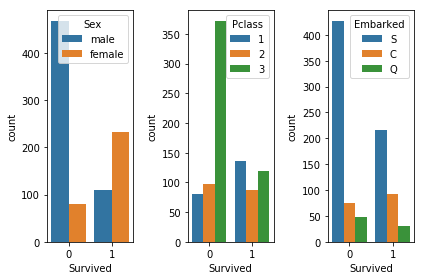

In [5]:
plt.subplot(1,3,1)
sns.countplot('Survived',data=train,hue='Sex')
plt.subplot(1,3,2)
sns.countplot('Survived',data=train,hue='Pclass')
plt.subplot(1,3,3)
sns.countplot('Survived',data=train,hue='Embarked')
plt.tight_layout()

## Insights 
Females have more survival rate
Passenger class 1 has better survival rate while 3 has the worst
People who embarked from S were the maximum in number for both who survived and didn't

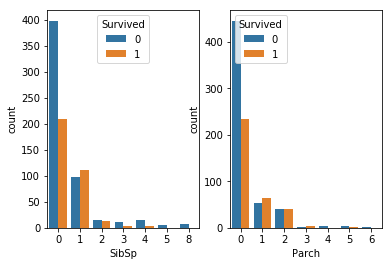

In [6]:
plt.subplot(1,2,1)
sns.countplot('SibSp',data=train,hue='Survived')
plt.subplot(1,2,2)
sns.countplot('Parch',data=train,hue='Survived')

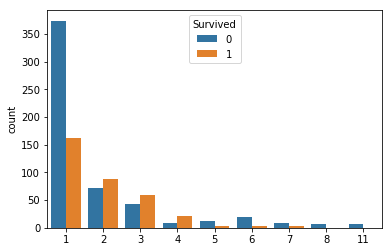

In [7]:
family=train['SibSp']+train['Parch']+1
sns.countplot(family,data=train,hue='Survived')

## Insights
The family of 2,3 and 4 have better chances if survival than a large family or those who are single

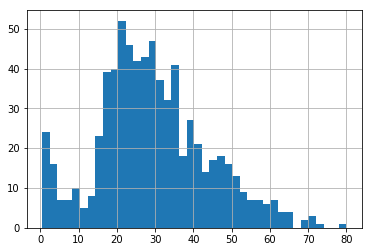

In [9]:
train['Age'].hist(bins=40)

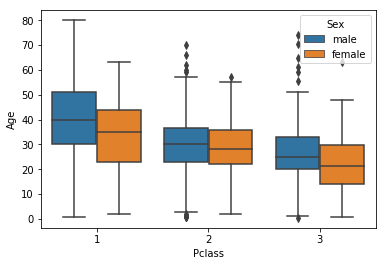

In [10]:
sns.boxplot(x='Pclass',y='Age',data=train,hue='Sex')

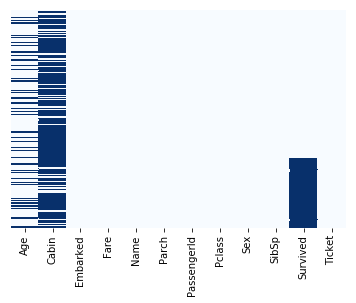

In [11]:
sns.heatmap(full.isnull(),cbar=False,yticklabels=False,cmap='Blues')
#We See a lot of missing data here which needs to be addressed

In [12]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## To fill in the missing values the following computations have been done:

Lets address the easier columns first

In [13]:
full['Embarked']=full['Embarked'].fillna(value=full['Embarked'].value_counts().index[0])

In [14]:
full['Fare'].fillna(full['Fare'].median(),inplace=True)

In [15]:
full['Cabin'].fillna('U',inplace=True) #because too many unknown values

In [16]:
full['Cabin']=full['Cabin'].apply(lambda x:x[0]) #Transformation of the feature

#### Now dwelling into some more manipulations to handle Age

In [17]:
full['NameTitles']=full['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()) #create a seperate column for name titles

In [18]:
#After googling each and every title, got to know something about them
#These mostly have European origins
titlegroup={    'Mr': 'Mr', 
    'Mrs': 'Mrs', 
    'Miss': 'Miss', 
    'Master':'Master', 
    'Don':'Royalty', 
    'Rev': 'Officer', #Instead of creating christianity put this into officer
    'Dr': 'Officer', 
    'Mme': 'Mrs', 
    'Ms':'Mrs',
    'Major': 'Officer',
    'Lady':'Royalty',
    'Sir':'Royalty',
    'Mlle': 'Miss',
    'Col': 'Officer',
    'Capt': 'Officer',
    'the Countess': 'Royalty',
    'Jonkheer':'Royalty', 
    'Dona':'Royalty'}

In [19]:
full['NameTitles']=full['NameTitles'].map(titlegroup)

In [20]:
full.pivot_table('Age','Pclass',['Sex','NameTitles'],aggfunc='median')

Sex        female                         male                      
NameTitles   Miss   Mrs Officer Royalty Master    Mr Officer Royalty
Pclass                                                              
1            30.0  45.0    49.0    39.0    6.0  41.5    52.0    40.0
2            20.0  30.0     NaN     NaN    2.0  30.0    41.5     NaN
3            18.0  31.0     NaN     NaN    6.0  26.0     NaN     NaN

In [21]:
Agegroup=full.groupby(['Pclass','Sex','NameTitles'])['Age']

In [22]:
Agegroup.median()

Pclass  Sex     NameTitles
1       female  Miss          30.0
                Mrs           45.0
                Officer       49.0
                Royalty       39.0
        male    Master         6.0
                Mr            41.5
                Officer       52.0
                Royalty       40.0
2       female  Miss          20.0
                Mrs           30.0
        male    Master         2.0
                Mr            30.0
                Officer       41.5
3       female  Miss          18.0
                Mrs           31.0
        male    Master         6.0
                Mr            26.0
Name: Age, dtype: float64

In [23]:
full['Age']=Agegroup.apply(lambda x:x.fillna(x.median()))

In [24]:
full['FamilySize']=full['SibSp']+full['Parch']+1 #As seen in the above graph, family size of 2-5 had a better survival rate 

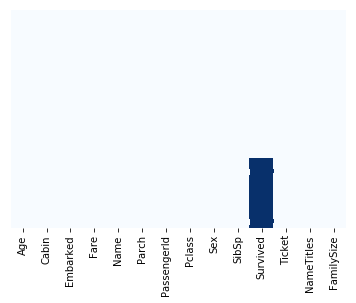

In [25]:
sns.heatmap(full.isnull(),cbar=False,yticklabels=False,cmap='Blues')
#We See a lot of missing data here which needs to be addressed

### Now we see that the graph is only missing the survived values which can be deduced from the modeling, thus this dataset is ready for modeling

In [26]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,NameTitles,FamilySize
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1


#### Further: 
Because machine learning algorithm can't work around data such as Name, Ticket I eventually would drop it or not use it
For categorical data such as cabin, embarked, Sex that are in English Letters these need to be converted into numbers as ML Algorthm cannot understand English Letters but numbers. For this I used something known as Dummy variables

In [27]:
full['Sex']=pd.get_dummies(full['Sex'],drop_first=True) #drop_first avoid co-linearity problem. Drops the obvious first column
#However when there are more than 2 categorical, to give equal wieghts they are assigned binary dunnmy variables
nametitle=pd.get_dummies(full['NameTitles'],prefix='NameTitle',drop_first=True)
embarked=pd.get_dummies(full['Embarked'],prefix='Embarked',drop_first=True)
cabin=pd.get_dummies(full['Cabin'],prefix='Cabin',drop_first=True)
pclass=pd.get_dummies(full['Pclass'],prefix='Pclass',drop_first=True)

In [28]:
full_dummies=pd.concat([full,nametitle,embarked,cabin,pclass],axis=1)
full_dummies.drop(['Cabin','Embarked','Pclass','NameTitles','Name','Ticket','PassengerId'],inplace=True,axis=1)

In [29]:
full_dummies.head()

,Age,Fare,Parch,Sex,SibSp,Survived,FamilySize,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_2,Pclass_3
0,22.0,7.2500,0,1,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,38.0,71.2833,0,0,1,1.0,2,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,0,1.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,35.0,53.1000,0,0,1,1.0,2,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,35.0,8.0500,0,1,0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [30]:
full_train=full_dummies.iloc[:train.shape[0]]
full_test=full_dummies.iloc[testPassengerId[0]-1:]

In [31]:
train_X=full_train.drop('Survived',axis=1)
test_X=full_test.drop('Survived',axis=1)
train_y=full_train['Survived']
test_y=full_test['Survived']

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model=LogisticRegression()
model.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
predictions=model.predict(test_X)

In [35]:
from sklearn import metrics

In [36]:
print(metrics.classification_report(train_y,model.predict(train_X)))

             precision    recall  f1-score   support

        0.0       0.85      0.88      0.87       549
        1.0       0.80      0.76      0.78       342

avg / total       0.83      0.83      0.83       891

